In [1]:
import numpy as np
import pandas as pd
import os
import random
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch 

## 

# torchvision.datasets - get datasets and data loading for computer vision 
# torchvision.models : pretrained models
# torchvision.transforms : functions for manipulating your vision data (images) to be suitable for with an ML Model ]
# torch.utils.data.Datsets : base datse class for pytorch
# torch.utils.data.DataLoader: Creates a Python iterable over a dataset 

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor
#ToTensor L convert PIL Image to numpy array 
from torch.utils.data import Dataset,DataLoader

In [2]:
torch.__version__
device = "cuda" if torch.cuda.is_available() else "cpu"

In [3]:
device

'cuda'

In [4]:
## Getting a dataset :Fashion Mnist 

#setup training data 

train_data = datasets.FashionMNIST(root = 'data',
                                   train = True,
                                   download = True,
                                   transform = ToTensor(),
                                   target_transform = None)


test_data = datasets.FashionMNIST(root = 'data',
                                   train = False,
                                   download = True,
                                   transform = ToTensor(),
                                   target_transform = None)






100%|██████████| 26421880/26421880 [00:01<00:00, 15897151.66it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 264872.71it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 5037325.79it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 6201113.44it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [5]:
len(train_data),len(test_data)

(60000, 10000)

In [6]:
#See the training example 
image,label = train_data[0]
image.shape,label


(torch.Size([1, 28, 28]), 9)

In [7]:
class_names = train_data.classes 
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

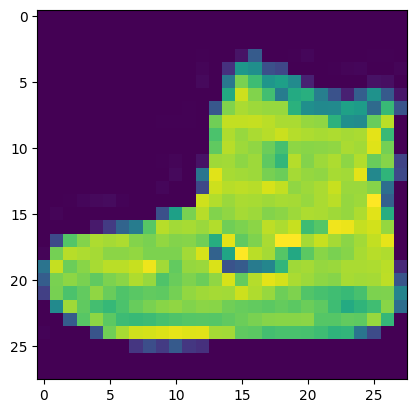

In [8]:
# Visualize image as image 
import matplotlib.pyplot as plt 

image,label = train_data[0]
plt.imshow(image.permute(1,2,0)) #Error -> Shape doesn't match matplotlib expects height or width or color channel to be last




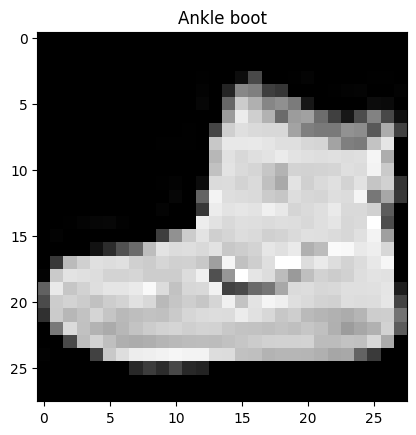

In [9]:
plt.imshow(image.squeeze(),cmap = 'gray')
plt.title(class_names[label])
plt.show()

In [10]:
## DataLoader and Understanding Minibatch : Andrew ng minbatch !!
# Turning out datset to dataloader
# DataLoader turns out dataset into a python iterable 
# It goes same for text,audio and everything 

BATCH_SIZE = 32

train_dataloader = DataLoader(dataset = train_data,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              )

test_dataloader = DataLoader(dataset = test_data,
                              batch_size = BATCH_SIZE,
                              shuffle = False,
                              )



In [11]:
train_dataloader,test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x7fdc98bf5540>,
 <torch.utils.data.dataloader.DataLoader at 0x7fdc98bf5180>)

In [12]:
len(train_dataloader),len(test_dataloader) # 1875 of batches of size 32, 313 of batches of size 32 

(1875, 313)

In [13]:
#show Example 
# check out what's inside the training dataloader 

train_features_batch,train_labels_batch = next(iter(train_dataloader))

In [14]:
## Make Model

class Baseline(nn.Module):

    def __init__(self,input_shape,
                 hidden_unit,
                 output_shape):
        super().__init__()
        
        self.layer1 = nn.Linear(input_shape,hidden_unit)
        self.layer2 = nn.Linear(hidden_unit,output_shape)
        self.relu = nn.ReLU()

        self.flatten = nn.Flatten() #C*H*W (1,28,28) -> (1,28*28)

    def forward(self,x):
        x = self.flatten(x)
        x = self.relu(x)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)

        return x 

model = Baseline(input_shape = 28*28,
                 hidden_unit = 10,
                 output_shape = 10).to(device)


In [15]:
next(model.parameters()).device # Check if model is Cuda 

device(type='cuda', index=0)

In [16]:
## Writing Training Loops and Test Loops 

In [17]:
# Loop thorugh epoochs 
# Loop through training batches, perform trainin steps, calculate the train loss per batch
# Loop thorugh testing batches,

In [16]:

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model.parameters(),
                            lr = 0.1)

In [17]:
import requests
from pathlib import Path 

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)
from helper_functions import accuracy_fn

In [18]:
from tqdm.auto import tqdm

In [19]:
#
def train_model(epochs,
                dataloader,
                model,
                loss_fn,
                accuracy_fn,
                optimizer):
    
    

    for epoch in range(epochs):

        loss_total = 0
        acc = 0

        model.train()

        for batch,(x,y) in tqdm(enumerate(dataloader)):

            x,y = x.to(device),y.to(device)

            y_pred = model(x)

            loss = loss_fn(y_pred,y)

            optimizer.zero_grad()

            loss.backward()

            optimizer.step()

            loss_total += loss

            acc += accuracy_fn(y,y_pred.argmax(dim=-1))

        loss_total /= len(dataloader)
        acc /= len(dataloader)

        print(f"Epoch:{epoch},Loss:{loss_total},Accuracy:{acc}")
        print('--------------------------')

    

        

        

train_model(3,
            train_dataloader,
            model,
            loss_fn,
            accuracy_fn,
            optimizer)



0it [00:00, ?it/s]

Epoch:0,Loss:0.6112604141235352,Accuracy:78.33833333333334
--------------------------


0it [00:00, ?it/s]

Epoch:1,Loss:0.46729764342308044,Accuracy:83.36333333333333
--------------------------


0it [00:00, ?it/s]

Epoch:2,Loss:0.43852877616882324,Accuracy:84.19166666666666
--------------------------


In [20]:
## Make prediction and get Model results 
def eval_model(model,
               dataloader, 
               loss_fn,
               accuracy_fn):

    model.eval()
    
    loss = 0
    acc = 0
    
    model.to(device)
    with torch.inference_mode():

    

        for x_test,y_test in tqdm(dataloader):

            x_test,y_test = x_test.to(device),y_test.to(device)

            

            y_pred = model(x_test)
            loss += loss_fn(y_pred,y_test)
            acc += accuracy_fn(y_test, 
                               y_pred.argmax(dim=-1))

        loss /= len(dataloader)
        acc /= len(dataloader)


    return {"model_name": model.__class__.__name__,
            "model_loss":loss.item(),
            "model_acc":acc}

results = eval_model(model,test_dataloader,loss_fn,accuracy_fn)





  0%|          | 0/313 [00:00<?, ?it/s]

In [21]:
results['model_name'],results['model_loss'],results['model_acc']

('Baseline', 0.4667261838912964, 83.51637380191693)

In [27]:
# Setup Device-Agnostic Code for Running Experiments on the 

In [22]:
!nvidia-smi

Thu May 25 11:05:37 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   37C    P0    40W / 300W |   1020MiB / 16384MiB |      1%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [23]:
#Creat CNN (Convolutional Neural Network)

class CNN(nn.Module):
    """

    MOdel architecture that replicates the TinyVGG
    Model from blahblah

    """

    def __init__(self,
                 input_shape:int,
                 hidden_unit:int,
                 output_shape:int):
        super().__init__()

        def block(in_channels,
                  out_channels,
                  kernel_size,
                  stride,
                  padding):
            package = []
            
            package += [nn.Conv2d(in_channels=in_channels,
                                  out_channels = out_channels,
                                  kernel_size = kernel_size,
                                  stride = stride,
                                  padding = padding)]

            package += [nn.ReLU()]
            
            return package 

        self.conv1 = nn.Sequential(*block(in_channels = input_shape,
                                          out_channels = hidden_unit,
                                          kernel_size = 3,
                                          stride = 1,
                                          padding = 1))
        
        self.conv2 = nn.Sequential(*block(in_channels = hidden_unit,
                                          out_channels = hidden_unit,
                                          kernel_size = 3,
                                          stride = 1,
                                          padding = 1))
        

        self.conv3 = nn.Sequential(*block(in_channels = hidden_unit,
                                          out_channels = hidden_unit,
                                          kernel_size = 3,
                                          stride = 1,
                                          padding = 1))

        
        self.classifier = nn.Sequential(nn.Flatten(),
                                       nn.Linear(in_features =1960, #Trick to calculate this 
                                                 out_features = output_shape))
        
        self.maxpool = nn.MaxPool2d(2)

    def forward(self,x):

        x = self.conv1(x)
        # print(x.shape)
        x = self.conv2(x)
        # print(x.shape)
        x = self.maxpool(x)
        # print(x.shape)
        x = self.conv3(x)
        # print(x.shape)
        x = self.classifier(x)

        return x 










In [24]:
model2 = CNN(input_shape = 1,
       hidden_unit = 10,
       output_shape=10).to(device)


In [31]:
# Create a single conv2d laye

In [25]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params = model2.parameters(),lr = 0.01)


In [26]:
train_model(3,
            train_dataloader,
            model2,
            loss_fn,
            accuracy_fn,
            optimizer)


0it [00:00, ?it/s]

Epoch:0,Loss:0.7683668732643127,Accuracy:72.93
--------------------------


0it [00:00, ?it/s]

Epoch:1,Loss:0.46373534202575684,Accuracy:83.73666666666666
--------------------------


0it [00:00, ?it/s]

Epoch:2,Loss:0.41674694418907166,Accuracy:85.37
--------------------------


In [27]:
results = eval_model(model2,test_dataloader,loss_fn,accuracy_fn)
results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'CNN',
 'model_loss': 0.4537740647792816,
 'model_acc': 83.61621405750799}

In [32]:
import os 
os.getcwd()

'/content'

In [38]:
from pathlib import Path

model_path = Path("models")
model_path.mkdir(parents = True,
                 exist_ok = True)
model_name = "model2.pth"

model_save_path = model_path / model_name
torch.save(model2.state_dict(),
           model_save_path)